In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [19]:
data =pd.read_csv('delivery_time.csv')

In [3]:
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
#EDA and data visualization
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

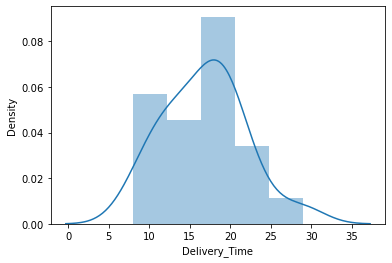

In [5]:
sns.distplot(data['Delivery_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

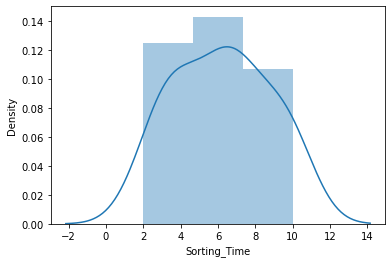

In [6]:
sns.distplot(data['Sorting_Time'])

In [7]:
#checking for co relation 
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

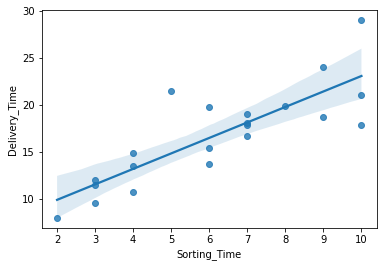

In [8]:
#Visualization of Correlation beteen x and y
sns.regplot(x=data['Sorting_Time'],y=data['Delivery_Time'])

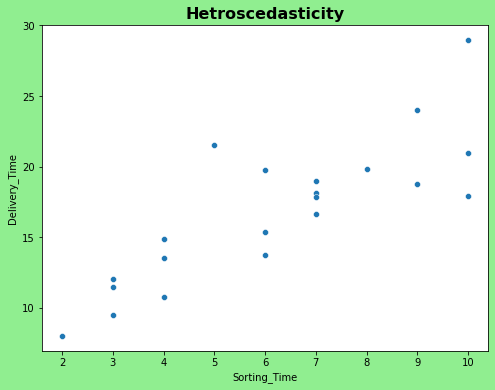

In [9]:
#Checking for Homoscedasticity or Hetroscedasticity
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['Sorting_Time'], y = data['Delivery_Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [10]:
#It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way

In [11]:
data.var()

Delivery_Time    25.754619
Sorting_Time      6.461905
dtype: float64

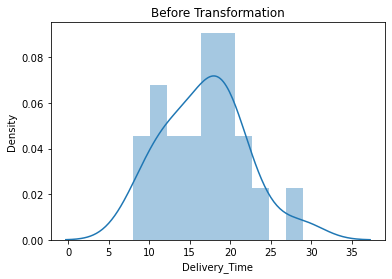

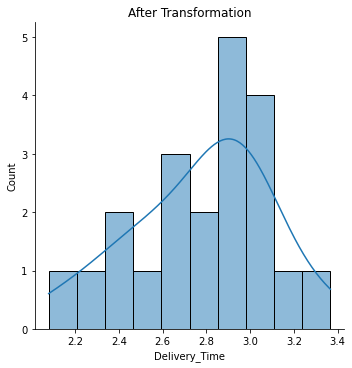

In [12]:
#Feature Engineering
#Trying different transformation of data to estimate normal distribution and to remove any skewness
sns.distplot(data['Delivery_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['Delivery_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

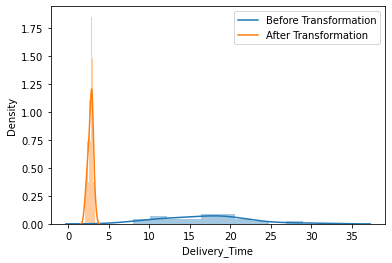

In [13]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Delivery_Time'], bins = 10, kde = True)
sns.distplot(np.log(data['Delivery_Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

In [14]:
#How log transformation affects the data and it scales the values down. Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

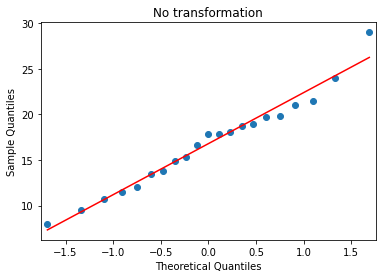

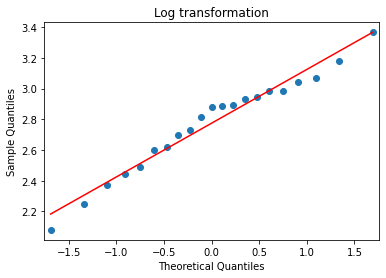

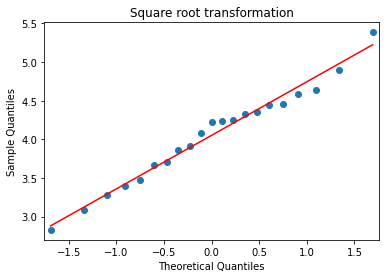

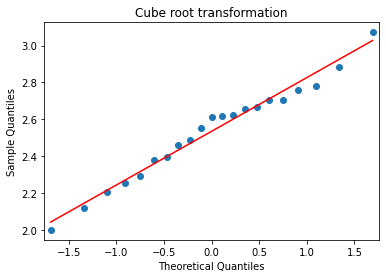

In [15]:
import statsmodels.regression.linear_model as sm
smf.qqplot(data['Delivery_Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Delivery_Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Delivery_Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['Delivery_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

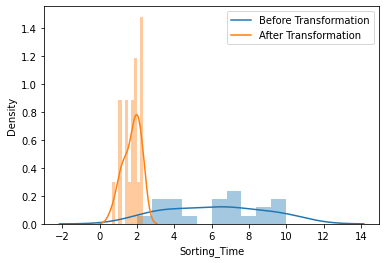

In [16]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Sorting_Time'], bins = 10, kde = True)
sns.distplot(np.log(data['Sorting_Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

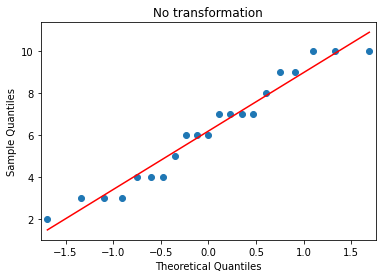

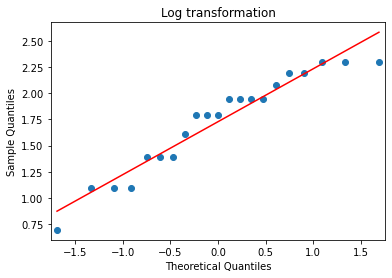

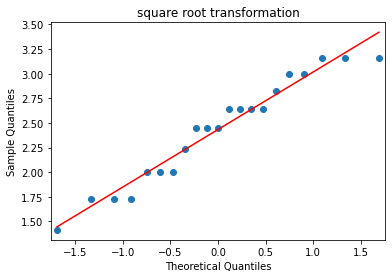

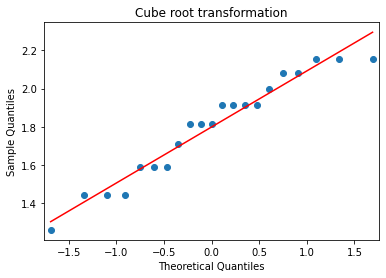

In [17]:
smf.qqplot(data['Sorting_Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Sorting_Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Sorting_Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(data['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [20]:
#Fitting a Linear Regression Model
model = sm.ols('Delivery_Time~Sorting_Time', data = data).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        12:25:29   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#As you can notice in the above model
#The R-squared and Adjusted R-squared scores are still below 0.85.
#(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
#Lets Try some data transformation to check whether these scores can get any higher than this.

In [22]:
#Square Root transformation on data
model1 = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Tue, 04 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                            12:26:34   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#As you can notice in the above model
#After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
#Lets Try other data transformation to check whether these scores can get any higher than this.

In [24]:
#Cube Root transformation on Data
model2 = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Tue, 04 Apr 2023   Prob (F-statistic):           4.90e-07
Time:                            12:27:32   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#As you can notice in the above model
#After Cueb root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
#Lets Try other data transformation to check whether these scores can get any higher than this.

In [25]:
#Log transformation on Data
model3 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 04 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                           12:28:24   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#As you can notice in the above model.After log transformation on the Data, This Model has scored the highest R-squared and 
#Adjusted R-squared scores than the previous model. Yet both Adjusted R-squared and R-squared scores are still below 0.85 which
#is a thumb rule we consider for a good model for prediction.
#Though it is now close to 0.8 which for a single feature/predictor variable or single independent 
#variable is expected to be low. Hence , we can stop here.


In [26]:
#Model Testing
#As Y = Beta0 + Beta1*(X)
#Finding Coefficient Parameters (Beta0 and Beta1 values)
model.params


Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [27]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [28]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

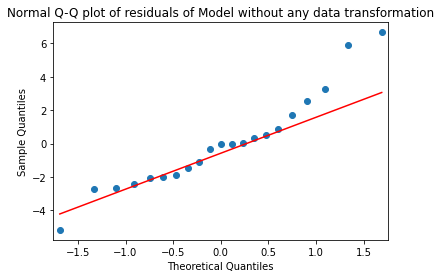

In [29]:
#Residual Analysis
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

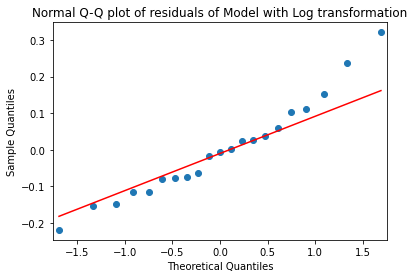

In [30]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

In [31]:
#As you can notice in the above plots
#Both The Model have slightly different plots
#The first model is right skewed and doesn't follow normal distribution
#The second model after log-transformation follows normal distributon with less skewness than first model

In [32]:
#Residual Plot to check Homoscedasticity or Hetroscedasticity

In [33]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

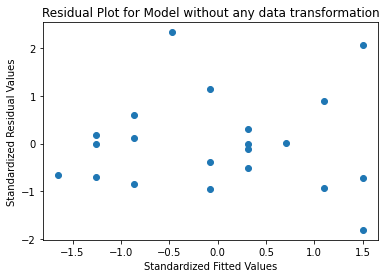

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

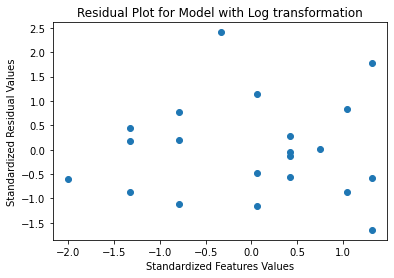

In [35]:
plt.scatter(get_standardized_values(model2.fittedvalues), get_standardized_values(model2.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [36]:
#As you can notice in the above plots
#Both The Model have Homoscedasciticity.
#Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

In [ ]:
#Model Validation
#Comparing different models with respect to their Root Mean Squared Errors

In [38]:
from sklearn.metrics import mean_squared_error
model1_pred_y =np.square(model1.predict(data['Sorting_Time']))
model2_pred_y =pow(model2.predict(data['Sorting_Time']),3)
model3_pred_y =np.exp(model3.predict(data['Sorting_Time']))

In [39]:
model1_rmse =np.sqrt(mean_squared_error(data['Delivery_Time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data['Delivery_Time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data['Delivery_Time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.9349037688901394 
model1= 2.7622942793208676 
model2= 2.7555843098935746 
model3= 2.7458288976145493


In [42]:
data1 = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data1, key=data1.get)

'model2'

In [ ]:
#As model2 has the minimum RMSE and highest Adjusted R-squared score. 
#Hence, we are going to use model2 to predict our values
#Model2 is the model where we did log transformation on both dependent variable as well as
#on independent variable

In [43]:
#Predicting values from Model with Log Transformation on the Data
predicted = pd.DataFrame()
predicted['Sorting_Time'] = data.Sorting_Time
predicted['Delivery_Time'] = data.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


In [44]:
#Predicitng from Original Model without any data transformation
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = data.Sorting_Time
predicted1['Delivery_Time'] = data.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
